In [1]:
import pandas as pd
import numpy as np
from matplotlib.pyplot import *
import seaborn as sns

/home/george/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
df = pd.read_csv('flight_delays.csv')
df.head(10)

,Month,DayofMonth,DayOfWeek,DepTime,UniqueCarrier,Origin,Dest,Distance,dep_delayed_15min
0,c-8,c-21,c-7,1934,AA,ATL,DFW,732,N
1,c-4,c-20,c-3,1548,US,PIT,MCO,834,N
2,c-9,c-2,c-5,1422,XE,RDU,CLE,416,N
3,c-11,c-25,c-6,1015,OO,DEN,MEM,872,N
4,c-10,c-7,c-6,1828,WN,MDW,OMA,423,Y
5,c-8,c-3,c-4,1918,NW,MEM,MCO,683,N
6,c-1,c-27,c-4,754,DL,PBI,LGA,1035,N
7,c-4,c-29,c-6,635,OH,MSP,CVG,596,N
8,c-7,c-28,c-5,735,AA,ONT,DFW,1189,N
9,c-6,c-20,c-2,2029,OO,DEN,PSC,853,N


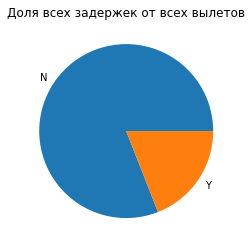

In [3]:
counts = df['dep_delayed_15min'].value_counts()
pie(counts, labels = counts.index)
title('Доля всех задержек от всех вылетов')
show()

Text(0, 0.5, 'Number of delays')

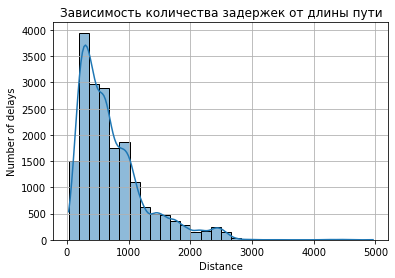

In [4]:
title('Зависимость количества задержек от длины пути')
sns.histplot(df[df.dep_delayed_15min == "Y"], x="Distance", bins = 30, kde = True)
grid()
ylabel("Number of delays")

/tmp/ipykernel_190056/3265819023.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_delayed_destinations.index, y=top_delayed_destinations.values, palette='viridis', ax=axes[0])
/tmp/ipykernel_190056/3265819023.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_delayed_origins.index, y=top_delayed_origins.values, palette='viridis', ax=axes[1])


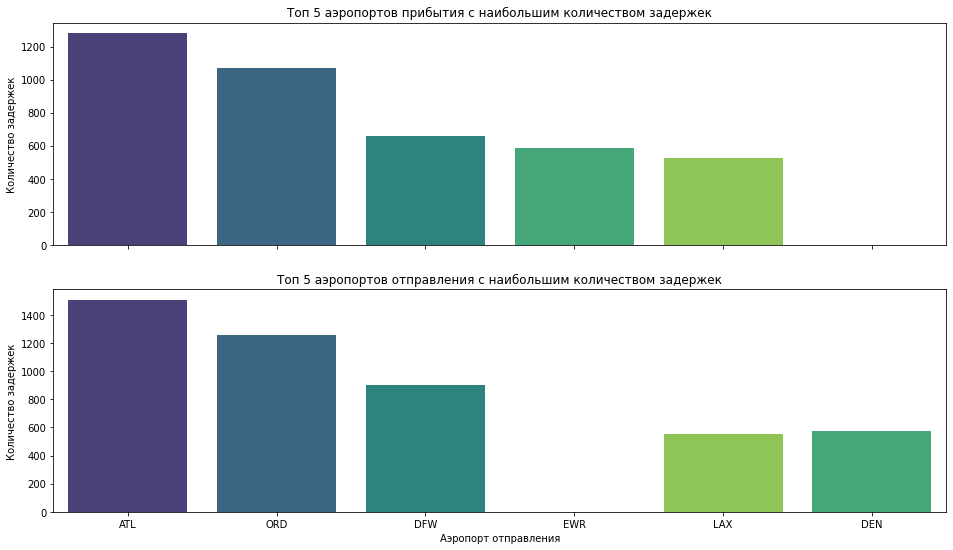

In [5]:
delayed_flights = df[df['dep_delayed_15min'] == "Y"]
top_delayed_destinations = delayed_flights.groupby('Dest')['dep_delayed_15min'].count().sort_values(ascending=False).head(5)
top_delayed_origins = delayed_flights.groupby('Origin')['dep_delayed_15min'].count().sort_values(ascending=False).head(5)

fig, axes = subplots(2, 1, sharex = 1, figsize=(16, 9))

sns.barplot(x=top_delayed_destinations.index, y=top_delayed_destinations.values, palette='viridis', ax=axes[0])
axes[0].set_title('Топ 5 аэропортов прибытия с наибольшим количеством задержек')
axes[0].set_xlabel('Аэропорт прибытия')
axes[0].set_ylabel('Количество задержек')

sns.barplot(x=top_delayed_origins.index, y=top_delayed_origins.values, palette='viridis', ax=axes[1])
axes[1].set_title('Топ 5 аэропортов отправления с наибольшим количеством задержек')
axes[1].set_xlabel('Аэропорт отправления')
axes[1].set_ylabel('Количество задержек')

show()

/tmp/ipykernel_190056/615502658.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Season', data = df[df['dep_delayed_15min'] == "Y"], palette='viridis')


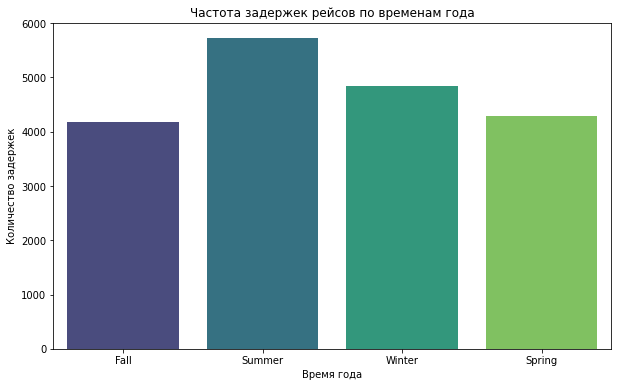

In [6]:
seasons = {"Winter": {1, 2, 12}, "Spring": {3, 4, 5}, "Summer": {6, 7, 8}, "Fall": {9, 10, 11}}

df = pd.read_csv('flight_delays.csv')

df['Month'] = df['Month'].apply(lambda x: int(x.split('-')[1])).astype(int)
df['Season'] = df['Month'].map({month: season for season, months in seasons.items() for month in months})

figure(figsize=(10, 6))
sns.countplot(x='Season', data = df[df['dep_delayed_15min'] == "Y"], palette='viridis')
title('Частота задержек рейсов по временам года')
xlabel('Время года')
ylabel('Количество задержек')
show()

/tmp/ipykernel_190056/2436726024.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_carriers.index, y=top_10_carriers.values, palette='viridis')


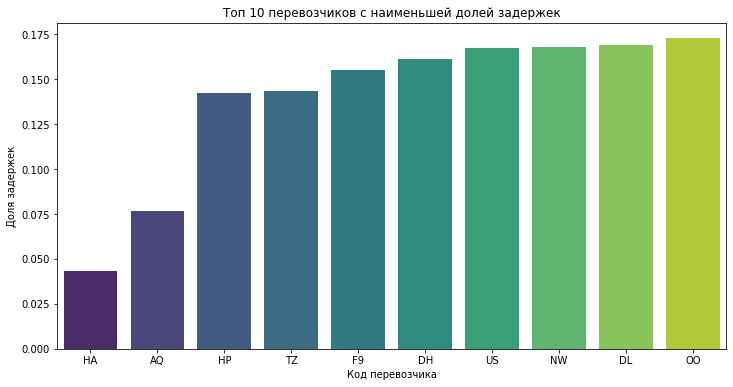

In [7]:
df = pd.read_csv('flight_delays.csv')
df['dep_delayed_15min'] = df['dep_delayed_15min'].map({'Y': True, 'N': False})

top_10_carriers = df.groupby('UniqueCarrier')['dep_delayed_15min'].mean().sort_values().head(10)

figure(figsize=(12, 6))
sns.barplot(x=top_10_carriers.index, y=top_10_carriers.values, palette='viridis')
title('Топ 10 перевозчиков с наименьшей долей задержек')
xlabel('Код перевозчика')
ylabel('Доля задержек')
show()

/tmp/ipykernel_190056/2740037074.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=antitop_10.index, y=antitop_10.values, palette='viridis')


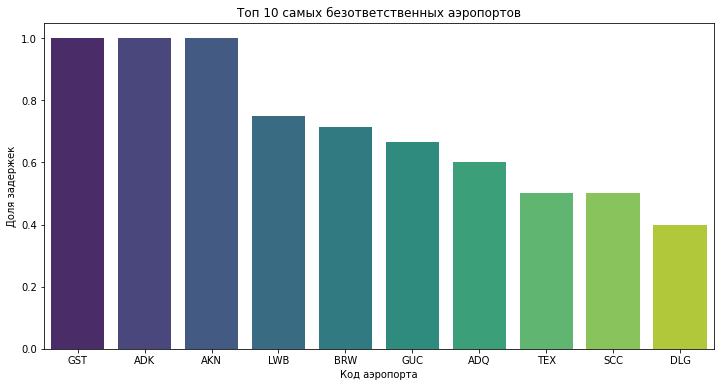

In [8]:
df = pd.read_csv('flight_delays.csv')
df['dep_delayed_15min'] = df['dep_delayed_15min'].map({'Y': True, 'N': False})

antitop_10 = df.groupby('Origin')['dep_delayed_15min'].mean().sort_values(ascending=False).head(10)

figure(figsize=(12, 6))
sns.barplot(x=antitop_10.index, y=antitop_10.values, palette='viridis')
title('Топ 10 самых безответственных аэропортов')
xlabel('Код аэропорта')
ylabel('Доля задержек')
show()